In [1]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
from scipy.constants import speed_of_light, elementary_charge, electron_mass, hbar as hbar_SI
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

In [2]:
me_SI = electron_mass
e_SI = elementary_charge
c_SI = speed_of_light

meV = e_SI * 1e-3
nm = 1e-9
ps = 1e-12

c = c_SI * ps / nm
hbar = hbar_SI / (meV * ps)
m = me_SI * c_SI ** 2 / meV / c ** 2

In [3]:
omega = 2 / hbar
vQD = 15

In [4]:
x_min, x_max = -50, 150
x0 = 0
x1 = 75

t1 = 2
t2 = t1 + (x1 - x0) / vQD

t_min, t_max = 0, 20
Nx, Nt = 5000, 5000

In [5]:
x_values = np.linspace(x_min, x_max, Nx)
t_values = np.linspace(t_min, t_max, Nt)

dx = x_values[1] - x_values[0]
dt = t_values[1] - t_values[0]

laplacian = sp.diags([1, -2, 1], offsets=[-1, 0, 1], shape=(Nx, Nx), format='csc') / dx ** 2
H_kinetic = - (hbar ** 2 / (2 * m)) * laplacian

In [6]:
V = 0.5 * m * omega ** 2 * x_values ** 2

In [7]:
H = H_kinetic + sp.diags(V, format="csc")

In [8]:
w, v = eigsh(H, k=4, which="SA")

In [9]:
psi0_in = v[:, 0]

In [10]:
psi0_in /= np.sqrt(np.sum(np.abs(psi0_in) ** 2) * dx)

In [11]:
psi0 = psi0_in

In [12]:
psi0

array([9.94879486e-17, 1.47836010e-16, 3.00833344e-16, ...,
       7.51663256e-16, 4.81998031e-16, 3.08322544e-16], shape=(5000,))

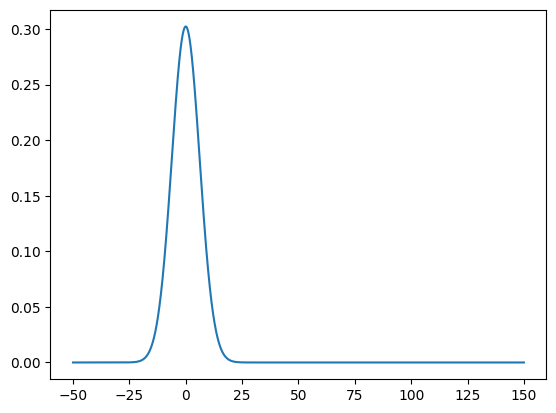

In [13]:
plt.plot(x_values, psi0)

In [14]:
def ground_state(x):
	A = (m * omega / (np.pi * hbar)) ** 0.25
	alpha = (m * omega) / (2.0 * hbar)
	return A * np.exp(-alpha * (x ** 2))

In [15]:
psi = ground_state(x_values)
norm = np.sqrt(np.sum(np.abs(psi)**2) * dx)
psi /= norm

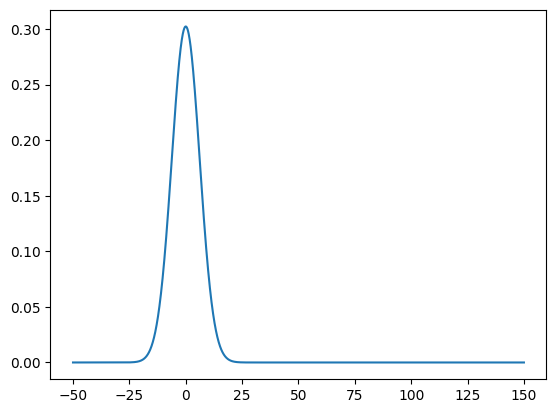

In [17]:
plt.plot(x_values, psi)

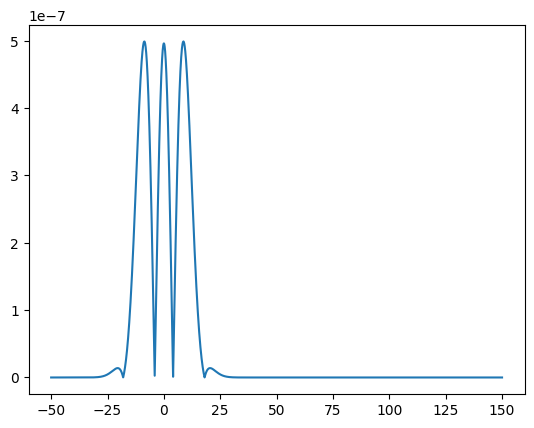

In [18]:
plt.plot(x_values, abs(psi - psi0))